# Main
## Funcionalidade
Esse notebook pode ser rodado diretamente num `Codespace` aqui no `Github`.

Rodar esse notebook para:
1. produzir o ajuste de parâmetros,
2. guardar os dados produzidos em arquivos para distribuição e reprodutibilidade,
3. produzir os gráficos.
4. para divulgação da pesquisa.

In [2]:
# Carrega as librarias e funções
from loaddata import *
from fit_isol import *
from fitting import *
from validation import *
from save_all import *
from load_all import *
from gerar_figs_param import *
from omega_gamma import *
from simulations import *
from mostrar_dados import *
from mapa1 import *
import pandas as pd
from serie_indice_isolamento import *

In [2]:
# Mostra todos os dados disponíveis
#mostrar_dados()

In [3]:
# Carrega os dados para fitting e para validação
dados_para_fit, dados_para_val = loaddata()

Carregando data...
Data loaded...OK!


Ajuste do polinômio de ordem 1 para os dados de isolamento.


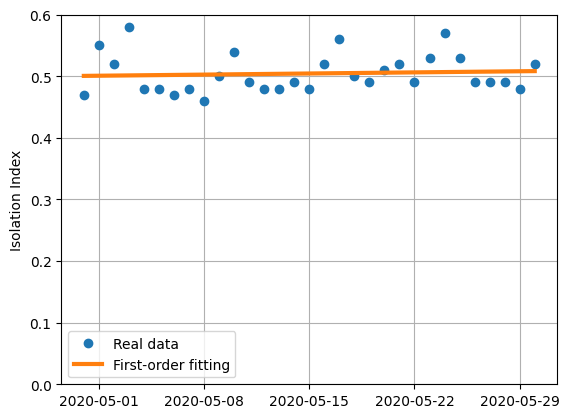


Dados após ajuste do índice de isolamento:

{'theta(t)': Polynomial([5.00645161e-01, 2.58064516e-04], domain=[-1,  1], window=[-1,  1], symbol='x'),
 'theta0': 0.5006451612903227,
 'theta1': 0.0002580645161290346,
 'Residuos': array([0.02860258]),
 'rank': 2,
 'sing_values': array([1.36341391, 0.37563613]),
 'rcond': 6.8833827526759706e-15}

Ajuste do índice de isolamento finalizado... OK!


In [4]:
# Ajuste do índice de isolamento
dados_fit_isol = fit_isol(dados_para_fit, order=1, salvar_figs=False)


Iniciando ajuste de parâmetros
------------------------------

Rodando otimização...
popt = [0.01996528 0.51547177 0.10000386 0.11441688 0.12853863 0.00223564]


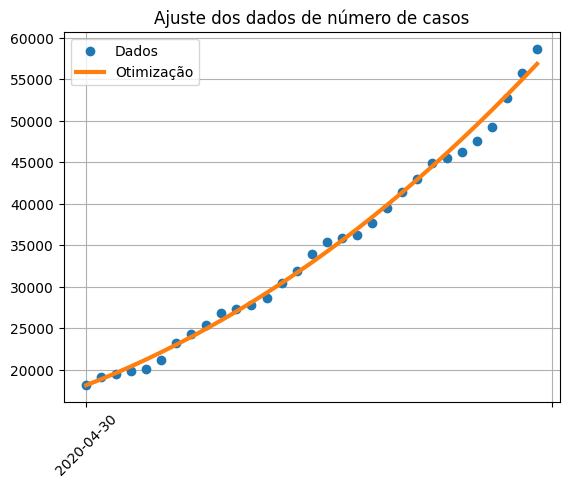


Dados após ajuste:

{'mu': 3.595e-05,
 'gamma': 0.01996527764299889,
 'alpha': 0.5154717748710703,
 'beta1': 0.10000385652268558,
 'beta2': 0.114416882290602,
 'beta3': 0.1285386344885868,
 'i0': 0.0022356433161130674,
 's0': 0.9962353322636424,
 'sick0': 0.0015290244202445563,
 'N': 31,
 'pvoc': array([[ 5.54504909e+05, -9.55484883e+06,  1.12606755e+06,
        -5.87445316e+06, -3.41609112e+04,  1.14327017e+05],
       [-9.55484883e+06,  1.64670555e+08, -1.94039789e+07,
         1.01238782e+08,  5.87415482e+05, -1.97029916e+06],
       [ 1.12606755e+06, -1.94039789e+07,  2.28678400e+06,
        -1.19298013e+07, -6.93612444e+04,  2.32174730e+05],
       [-5.87445316e+06,  1.01238782e+08, -1.19298013e+07,
         6.22415040e+07,  3.61284296e+05, -1.21133610e+06],
       [-3.41609112e+04,  5.87415482e+05, -6.93612444e+04,
         3.61284296e+05,  2.16185971e+03, -7.03040485e+03],
       [ 1.14327017e+05, -1.97029916e+06,  2.32174730e+05,
        -1.21133610e+06, -7.03040485e+03,  2.35

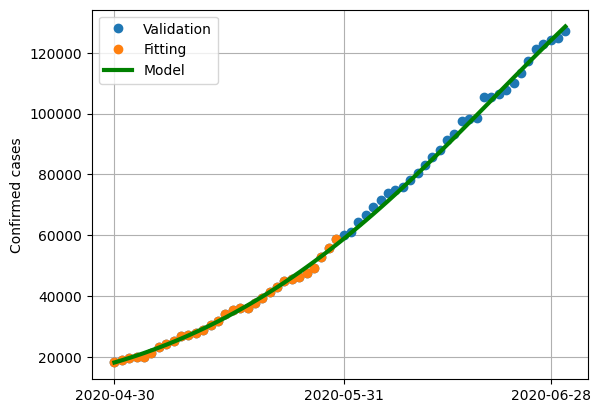

In [73]:
# Ajuste de parâmetros para os sicks
dados_fit_din = fitting(dados_fit_isol,\
                        dados_para_fit,\
                        salvar_figs=False)
# Validação do fitting anterior
validation(dados_fit_isol,\
           dados_fit_din,\
           dados_para_fit,\
           dados_para_val,\
           salvar_figs=False)

In [74]:
# Salvar dados em arquivo csv com a data no nome.
filename_iso, filename_din = save_all(dados_fit_isol,\
                                      dados_fit_din,\
                                      apresentar=False,\
                                      verificar=False)


Guardando todos os dados...

Dados do ajuste do indice de isolamento guardados no arquivo:
dados_iso-2023-03-06-19-38-55.csv .csv

Dados do ajuste dos dos parâmetros do sistema guardados no arquivo:
dados_din-2023-03-06-19-38-55.csv .csv


In [75]:
# Carregando dados salvos
csv1 = 'dados_iso-2023-03-06-19-38-55.csv'
csv2 = 'dados_din-2023-03-06-19-38-55.csv'
# pega sempre os últimos gerados
#csv1 = filename_iso
#csv2 = filename_din
dados_fit_isol_saved, dados_fit_din_saved = load_all(csv1, csv2)


Carregando dados do arquivo: dados_iso-2023-03-06-19-38-55.csv

Carregando dados do arquivo: dados_din-2023-03-06-19-38-55.csv

Dados carregados com sucesso...OK!



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


N = 62
tot_pop = 11869660
theta_t = 0.50064516 + 0.00025806·x


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


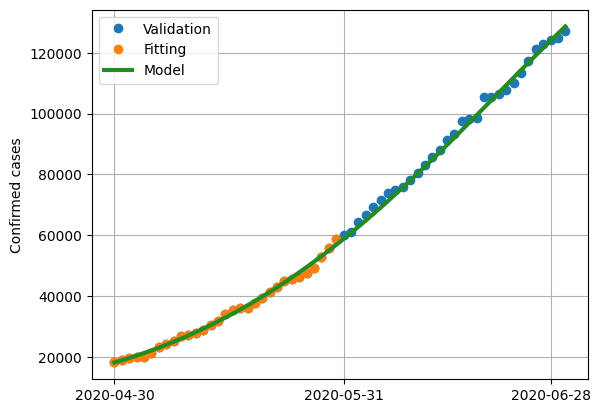

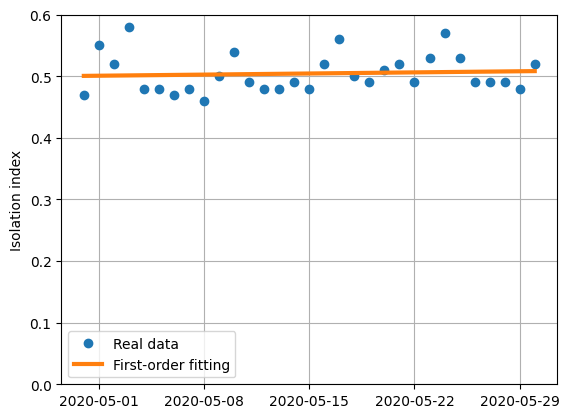

In [79]:
# Gerar figuras
gerar_figs_param(dados_para_fit,\
                 dados_para_val,\
                 dados_fit_isol_saved,\
                 dados_fit_din_saved,\
                 salvar_figs=True)



  omega = -m*theta+b
  theta crítico = 0.5839603654983293
  omega min = 0.028074066113463084
  m = 0.048075293756461975
  b = 0.028074066113463084
  theta_test = 0.45
  omega(theta)= 0.006440183923055197




<Figure size 640x480 with 0 Axes>

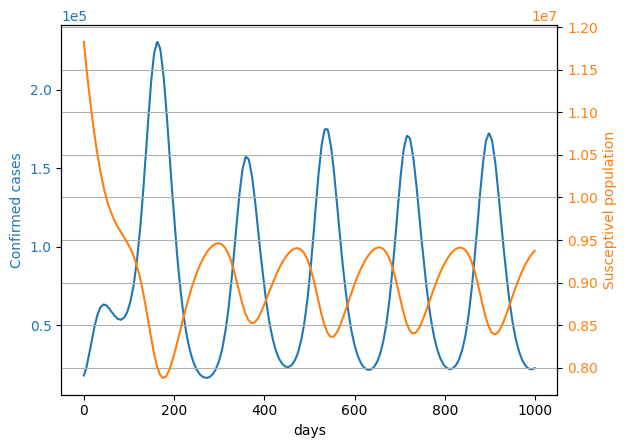

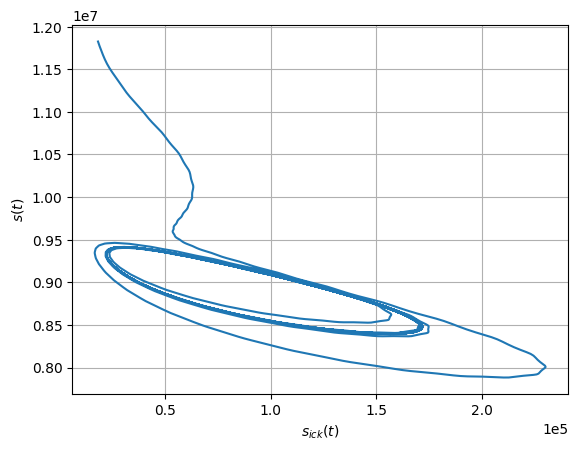

In [77]:
# Simulações
simulations(dados_para_fit,\
            dados_para_val,\
            dados_fit_isol_saved,\
            dados_fit_din_saved,\
            salvar_figs=False)

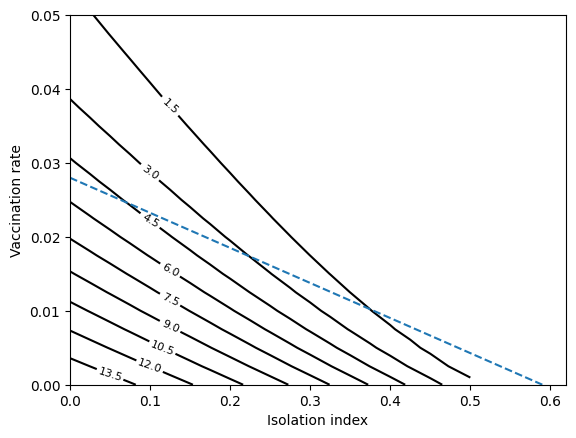

In [78]:
# mapa
mapa1(dados_para_val,\
      dados_fit_isol_saved,\
      dados_fit_din_saved,\
      salvar_figs=False)

In [ ]:
# Todo:[ ] Generar figura para a série completa do índice de isolamento 
serie_indice_isolamento()